# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از مدل‌های از قبل آموزش داده شده‌ی فریم ورک Tensorflow</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد نیاز</div>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود تصویر و نمایش آن</div>

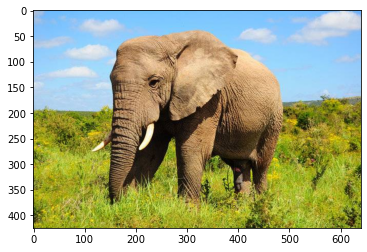

In [2]:
image = cv2.imread("images/elephant.jpg")
plt.imshow(image[...,::-1]);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود لیبلها</div>

In [4]:
classes = None
with open("model/tensorflow/imagenet_comp_graph_label_strings.txt", 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ساخت یک blob از روی تصویر</div>

In [7]:
inHeight = 224
inWidth = 224
swap_rgb = True
mean = [117, 117, 117]
scale = 1.0

# Create a 4D blob from a frame.
blob = cv2.dnn.blobFromImage(image, 
                             scale, 
                             (inWidth, inHeight), 
                             mean, swap_rgb, crop=False)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ساخت شبکه با لود مدل و وزنها</div>

In [8]:
net = cv2.dnn.readNetFromTensorflow("model/tensorflow/tensorflow_inception_graph.pb")

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معرفی ورودی به شبکه</div>

In [9]:
net.setInput(blob)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">دریافت خروجی مدل</div>

In [11]:
preds = net.forward()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش کلاس برنده</div>

In [12]:
idx = np.argmax(preds)
classes[idx]

'African elephant'

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">و یا نمایش n کلاس با بیشترین احتمال</div>

In [13]:
idxs = np.argsort(preds[0])[::-1][:3]
for idx in idxs:
    print(classes[idx])

African elephant
tusker
Indian elephant
